<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [5]:
class LinearLayer():
  # 학습파라미터(W, b)의 shape 설정
  def __init__(self, d_in, d_out):
    W_shape = (d_in, d_out)
    B_shape = (d_out)
    # 행렬 만들기
    self.W = np.random.normal(0,1, W_shape) # 정규분포를 따르는 랜덤 값 (평균 0, 표준편차 1)
    self.B = np.zeros(B_shape) # bias(덧셈) 디폴트값을 0

  def forward(self, X):
    # X : (n_sample, d_in)
    return X@self.W+self.B

layer1 = LinearLayer(d_in=3, d_out=3)
layer2 = LinearLayer(d_in=3, d_out=2)
print(layer1.W, layer1.B)
print(layer2.W, layer2.B)

X = np.array([[1,2,1]])
print(f'X: {X} shape: {X.shape}')
print(f'첫번째 레이어 계산결과: { layer1.forward(X) }')
print(f'두번째 레이어 계산결과: { layer2.forward(layer1.forward(X))}')

[[-1.18571748  1.01787683 -1.01299702]
 [-1.2556691  -0.27416467 -0.5816207 ]
 [ 0.72191173 -1.64841738 -0.04328352]] [0. 0. 0.]
[[-0.05862732 -0.45785172]
 [ 0.78131598  0.14528451]
 [ 1.11892285  1.41471411]] [0. 0.]
X: [[1 2 1]] shape: (1, 3)
첫번째 레이어 계산결과: [[-2.97514395 -1.17886988 -2.21952194]]
두번째 레이어 계산결과: [[-3.230119   -1.94908578]]


In [17]:
class Model():
  def __init__(self):
    self.layer1 = LinearLayer(d_in=3, d_out=3)
    self.layer2 = LinearLayer(d_in=3, d_out=2)

  def predict(self, x):
    z = self.layer1.forward(x)
    y = self.layer2.forward(z)
    return y

  # 학습 파라미터를 반환하는 함수
  def get_weights(self):
    return [ self.layer1.W, self.layer1.B, self.layer2.W, self.layer2.B ]

  # 학습 파라미터를 직접 정해주는 함수
  def set_weights(self, new_weight_list):
    self.layer1.W = new_weight_list[0]
    self.layer1.B = new_weight_list[1]
    self.layer2.W = new_weight_list[2]
    self.layer2.B = new_weight_list[3]

* 모델 불러오기

In [18]:
model = Model()
model.predict(X)

array([[-2.04737294, -3.30679561]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [19]:
X = np.array([1,2,1]).reshape(1,3) # X shape : (1,3)
W1_ = np.array([1,1,-1,1,0.5,-1,1,1,1]).reshape(3,3)  
B1_ = np.array([0,0,0]).reshape(1,3)
W2_ = np.array([1,0.5,-1,0.5,0,1]).reshape(3,2)
B2_ = np.array([1,-0.5]).reshape(1,2)

print(f'{X} X shape: {X.shape} ')
print(f'{W1_} W1_ shape: {W1_.shape}')
print(f'{B1_} B1_ shape: {B1_.shape}')
print(f'{W2_} W2_ shape: {W2_.shape}')
print(f'{B2_} B2_ shape: {B2_.shape}')

[[1 2 1]] X shape: (1, 3) 
[[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]] W1_ shape: (3, 3)
[[0 0 0]] B1_ shape: (1, 3)
[[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]] W2_ shape: (3, 2)
[[ 1.  -0.5]] B2_ shape: (1, 2)


* 학습 파라미터 확인

In [20]:
model.get_weights()

[array([[-0.98347816,  0.33873597, -0.54340051],
        [ 0.548144  , -0.25747232,  0.58818662],
        [ 0.48167782,  0.55947019,  0.98556612]]),
 array([0., 0., 0.]),
 array([[ 0.2532295 , -0.92803033],
        [-0.15573268,  0.55231292],
        [-1.32108564, -1.83299483]]),
 array([0., 0.])]

* 학습 파라미터 세팅

In [21]:
model.set_weights([W1_, B1_, W2_, B2_])
model.get_weights()

[array([[ 1. ,  1. , -1. ],
        [ 1. ,  0.5, -1. ],
        [ 1. ,  1. ,  1. ]]), array([[0, 0, 0]]), array([[ 1. ,  0.5],
        [-1. ,  0.5],
        [ 0. ,  1. ]]), array([[ 1. , -0.5]])]

* 예측 (순전파)

In [22]:
model.predict(X)

array([[2., 1.]])

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
- Step Function # 예외 ( 최근에는 사용하지 않음)
-------------------------=
- Sigmoid : 예측 결과가 두개 클랫 중 하나
- Softmax : 예측 결과가 세개 이상 클래스 중 하나
만약 마지막 층에서 활성화 안쓰면 회귀
--- 마지막 층에서 사용 ---
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
--- 중간 층에서 사용 ---
중간 층에서 사용될 때는 gradient(미분) 값이 중요
```


* 시각화를 위한 플롯팅 함수

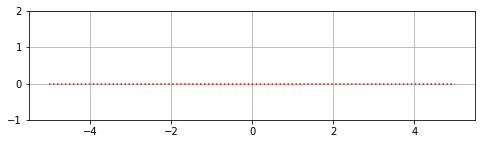

In [24]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.grid()

plot_func(xs=[1], ys=[1])

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [33]:
# 함수의 인풋 : 0차 텐서,  아웃풋: 0차 텐서
def sigmoid(x):
  return 1/(1+np.exp(-x))
sigmoid(-1)

0.2689414213699951

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [39]:
def sigmoid_grad(x):
  return sigmoid(x)*(1-sigmoid(x))
sigmoid_grad(0)

0.25

* 시각화

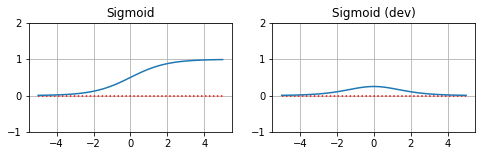

In [45]:
#xs = np.array([-2, -1, 0, 1, 2])
xs = np.linspace(-5, 5, 100) # -5부터, 5까지 100개의 숫자
plt.subplot(121);plot_func(xs, sigmoid(xs), title='Sigmoid')
plt.subplot(122);plot_func(xs, sigmoid_grad(xs), title='Sigmoid (dev)')



**Sigmoid 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [49]:
# 함수의 인풋 : 1차 텐서,  아웃풋: 1차 텐서
def softmax(xs): #[1,2,1]
  exs = np.exp(xs) # [np.exp(1), np.exp(2), np.exp(1)]
  sum_exs = np.sum(exs) # np.exp(1)+np.exp(2)+np.exp(1) # 0차텐서
  return exs / sum_exs # [np.exp(1)/sum_exs, np.exp(2)/sum_exs, np.exp(1)/sum_exs]
# 아웃풋의 요소들은 0~1까지의 값을 가지고 다 더하면 1이 된다.

softmax(np.array([-1,2,1,1]))

array([0.02788339, 0.56005279, 0.20603191, 0.20603191])

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [ ]:
# 예측 [0.7, 0.2, 0.1 ] 실제 [1, 0, 0] -> 0번째 클래스가 정답! (j=0)

In [54]:
def softmax_grad(xs, j=0):
  return (softmax(xs)*(1-softmax(xs)) )[j]

softmax_grad(np.array([0.7, 0.2, 1]))

0.223837075668383

* 시각화


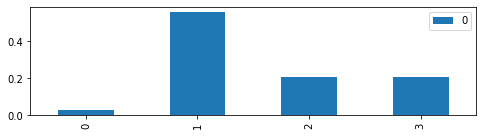

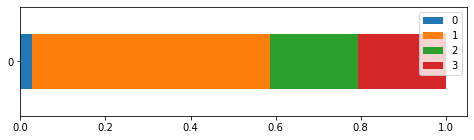

In [60]:
ys = softmax(np.array([-1,2,1,1]))
pd.DataFrame(ys).plot(kind='bar')
pd.DataFrame([ys]).plot(kind='barh', stacked=True)


**Softmax 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [61]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [62]:
def tanh_grad(x):
  return 1-(tanh(x)**2)

* 시각화

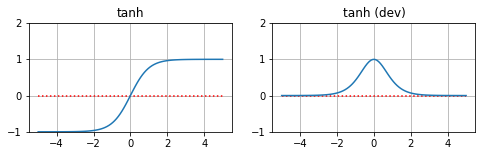

In [63]:
xs = np.linspace(-5,5,100)
plt.subplot(121);plot_func(xs, tanh(xs), title='tanh')
plt.subplot(122);plot_func(xs, tanh_grad(xs), title='tanh (dev)')


**Tanh 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

In [64]:
def ReLU(x):
  return np.maximum(0, x)

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [65]:
def ReLU_grad(x):
  return np.where( x >= 0, 1, 0)

* 시각화

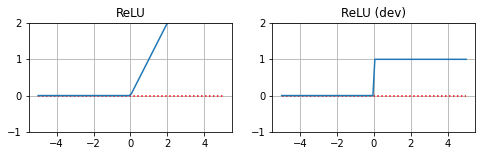

In [66]:
xs = np.linspace(-5,5,100)
plt.subplot(121);plot_func(xs, ReLU(xs), title='ReLU')
plt.subplot(122);plot_func(xs, ReLU_grad(xs), title='ReLU (dev)')



**ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

In [67]:
def PReLU(x, alpha=0.01):
  return np.maximum(alpha*x, x)

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [68]:
def PReLU_grad(x, alpha=0.01):
  return np.where( x >= 0, 1, alpha)

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.

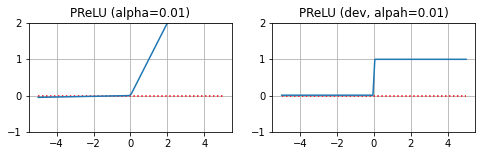

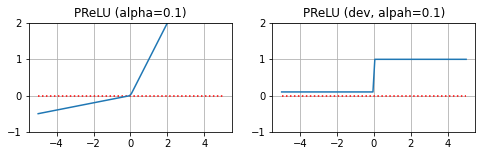

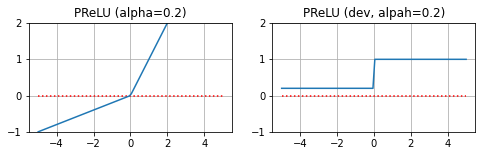

In [69]:
xs = np.linspace(-5,5,100)
for alpha in [0.01, 0.1, 0.2]:
  plt.subplot(121);plot_func(xs, PReLU(xs, alpha=alpha), title=f'PReLU (alpha={alpha})')
  plt.subplot(122);plot_func(xs, PReLU_grad(xs, alpha=alpha), title=f'PReLU (dev, alpah={alpha})')
  plt.show()



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

In [70]:
def ELU(x, alpha=1):
  return np.where( x >= 0, x, alpha*(np.exp(x)-1))

* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

In [71]:
def ELU_grad(x, alpha=1):
  return np.where( x >= 0, 1, alpha*np.exp(x) )

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.

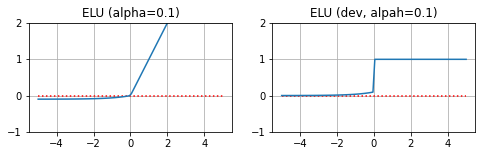

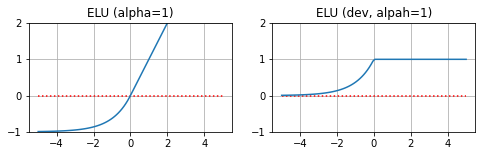

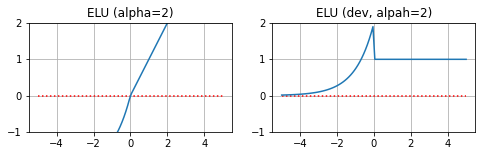

In [72]:
xs = np.linspace(-5,5,100)
for alpha in (0.1, 1, 2):
  plt.subplot(121);plot_func(xs, ELU(xs, alpha=alpha), title=f'ELU (alpha={alpha})')
  plt.subplot(122);plot_func(xs, ELU_grad(xs, alpha=alpha), title=f'ELU (dev, alpah={alpha})')
  plt.show()



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```


```